# Exploring Dandiset 001361: A Flexible Hippocampal Population Code for Experience Relative to Reward

**A Dandiset for cellular-resolution imaging and behavior in mice navigating a visually-cued virtual environment with shifting hidden reward locations**

---

**NOTE:**  
This notebook was generated with the assistance of AI and is intended as a guide and starting point for analysis. Please interpret the code and results with caution and verify outputs as you proceed with your own exploration.

---

## Overview

This notebook introduces **Dandiset 001361**:

- **Title:** A flexible hippocampal population code for experience relative to reward  
- **Authors:** Sosa, Marielena; Plitt, Mark H.; Giocomo, Lisa M.
- **Species:** Mus musculus (mouse)
- **Major Data:** Two-photon (2p) imaging from CA1, dense behavioral tracking, virtual reality navigation, reward events.
- **Sessions:** 11 mice, 152 imaging sessions, 92.6GB total.

Data was collected using 2-photon calcium imaging in hippocampal CA1 while mice navigated virtual linear tracks with shifting reward zones, supporting studies of spatial, reward, and sequence coding.

- **Dataset DOI:** [10.48324/dandi.001361/0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045)
- **Custom analysis code:** [GitHub Repo](https://github.com/GiocomoLab/Sosa_et_al_2024)

This notebook will guide you through:
1. Understanding the organization and metadata of the dataset  
2. Listing and exploring available data files  
3. Loading and summarizing NWB file content (imaging, behavior, segmentations)  
4. Generating useful visualizations of traces, behavior, and cell masks  
5. Demonstrating a basic reanalysis linking neural activity and behavior  

---

## Required Packages

This notebook assumes the following packages are installed:

- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `numpy`
- `matplotlib`
- `pandas`
- `seaborn`

(No install commands are included; see [DANDI documentation](https://www.dandiarchive.org/) for environment setup.)  
The code in this notebook only uses functionality and methods shown here—no advanced or undocumented features.

## Listing available NWB files in Dandiset 001361

Let's use the DANDI API to enumerate the files in this dataset and inspect the naming convention and size.

In [1]:
from dandi.dandiapi import DandiAPIClient
from itertools import islice
import pandas as pd

# Connect and get Dandiset object for the specific release
dandiset_id = "001361"
dandiset_version = "0.250406.0045"
client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List the first 10 NWB files and their metadata
assets = list(islice(dandiset.get_assets_by_glob("*.nwb"), 10))
files_info = []
for asset in assets:
    files_info.append({
        "filename": asset.path,
        "size_MB": asset.size / 1e6,
        "url": asset.download_url
    })
files_df = pd.DataFrame(files_info)
files_df

,filename,size_MB,url
0,sub-m11/sub-m11_ses-05_behavior+ophys.nwb,99.311004,https://api.dandiarchive.org/api/dandisets/001...
1,sub-m11/sub-m11_ses-04_behavior+ophys.nwb,89.674484,https://api.dandiarchive.org/api/dandisets/001...
2,sub-m11/sub-m11_ses-07_behavior+ophys.nwb,119.720332,https://api.dandiarchive.org/api/dandisets/001...
3,sub-m11/sub-m11_ses-06_behavior+ophys.nwb,94.611388,https://api.dandiarchive.org/api/dandisets/001...
4,sub-m11/sub-m11_ses-08_behavior+ophys.nwb,128.446344,https://api.dandiarchive.org/api/dandisets/001...
5,sub-m11/sub-m11_ses-10_behavior+ophys.nwb,110.882776,https://api.dandiarchive.org/api/dandisets/001...
6,sub-m11/sub-m11_ses-03_behavior+ophys.nwb,93.427620,https://api.dandiarchive.org/api/dandisets/001...
7,sub-m11/sub-m11_ses-09_behavior+ophys.nwb,110.016228,https://api.dandiarchive.org/api/dandisets/001...
8,sub-m11/sub-m11_ses-11_behavior+ophys.nwb,111.621748,https://api.dandiarchive.org/api/dandisets/001...
9,sub-m11/sub-m11_ses-12_behavior+ophys.nwb,120.944548,https://api.dandiarchive.org/api/dandisets/001...


- **Observation:**  
Each NWB file is named by subject and session, e.g., `sub-m11/sub-m11_ses-05_behavior+ophys.nwb`, and each typically contains data from one imaging session.

You can find more files or inspect additional metadata by browsing the [public Dandiset page](https://dandiarchive.org/dandiset/001361/0.250406.0045).

## Loading an Example NWB File

Here, we stream a representative NWB file for exploration—no download is needed. We will use:

- `remfile` and `h5py` for remote file access  
- `pynwb` for easy NWB structure navigation  

Let's extract and print basic metadata about the session and subject.

In [2]:
import h5py
import remfile
import pynwb

# Select an NWB file from above
nwb_path = files_df["filename"][0]  # Use the first listed file for demonstration

# Get download URL from DANDI
example_asset = next(dandiset.get_assets_by_glob(nwb_path))
remote_file = remfile.File(example_asset.download_url)
h5file = h5py.File(remote_file, "r")
io = pynwb.NWBHDF5IO(file=h5file, load_namespaces=True)
nwbfile = io.read()

# Extract session and subject metadata
session_metadata = {
    "Session description": nwbfile.session_description,
    "Session ID": nwbfile.session_id,
    "Experimenter": nwbfile.experimenter,
    "Subject ID": nwbfile.subject.subject_id,
    "Subject species": nwbfile.subject.species,
    "Subject sex": nwbfile.subject.sex,
    "Date of birth": nwbfile.subject.date_of_birth,
    "Recording date": str(nwbfile.session_start_time)
}
pd.Series(session_metadata)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description       processed suite2p data
Session ID                                    05
Experimenter                        (Mari Sosa,)
Subject ID                                   m11
Subject species                     Mus musculus
Subject sex                                    M
Date of birth          2022-09-20 00:00:00-07:00
Recording date         2023-02-25 00:00:00-08:00
dtype: object

## NWB File Content Overview

Let's summarize the types of behavioral and imaging data found in a typical file.

### Behavioral Variables

The behavioral processing module contains rich time-aligned time series. Here we list their names, descriptions, sampling units, and data shapes.

In [3]:
# List behavioral variables
behav_module = nwbfile.processing['behavior']
behav_series = behav_module.data_interfaces['BehavioralTimeSeries'].time_series
behavior_variable_names = list(behav_series.keys())
behav_summary = []
for name in behavior_variable_names:
    series = behav_series[name]
    behav_summary.append({
        'name': name,
        'description': series.description,
        'unit': series.unit,
        'data shape': series.data.shape
    })
behav_df = pd.DataFrame(behav_summary)
behav_df

,name,description,unit,data shape
0,Reward,reward delivery,mL,"(69,)"
1,autoreward,whether trial was automatically rewarded if th...,integer,"(20684,)"
2,environment,Virtual reality environment,AU,"(20684,)"
3,lick,"lick detection by capacitive sensor, cumulativ...",AU,"(20684,)"
4,position,Position in a virtual linear track,cm,"(20684,)"
5,reward_zone,reward zone entry (binary),integer,"(20684,)"
6,scanning,whether scanning occurred to collect ophys data,integer,"(20684,)"
7,speed,the speed of the subject measured over time,cm/s,"(20684,)"
8,teleport,"end of a trial, i.e. entry into the intertrial...",integer,"(20684,)"
9,trial number,"trial number, where each trial is a lap of the...",integer,"(20684,)"


- Most behavioral traces have one value for each imaging frame and are perfectly time-aligned with neural data.
- Typical variables include position, speed, licks, trial events, and reward times.
- "Reward" is sparse (event-based); most others are framewise.

### Imaging Data and ROI (Cell) Metadata

The processed optical physiology data includes dF/F traces, deconvolved event rates, and neuropil subtraction, all organized by ROI (cell mask).

There is also a segmentation table describing the extracted ROI masks and cell identities.

In [4]:
# Summarize processed imaging data and segmentation
ophys_module = nwbfile.processing['ophys']
data_interfaces = ophys_module.data_interfaces

summary = []
for name in ['Fluorescence', 'Deconvolved', 'Neuropil']:
    obj = data_interfaces[name].roi_response_series['plane0']
    summary.append({
        'name': name,
        'shape': obj.data.shape,
        'unit': obj.unit,
        'description': obj.description,
        'sampling rate': obj.rate
    })

# ROI table summary
imgseq = data_interfaces['ImageSegmentation']
plane_seg = imgseq.plane_segmentations['PlaneSegmentation']
roi_table = plane_seg.to_dataframe()
summary.append({
    'name': 'ROI table',
    'shape': roi_table.shape,
    'fields': list(roi_table.columns),
    'description': plane_seg.description
})

pd.DataFrame(summary)

,name,shape,unit,description,sampling rate,fields
0,Fluorescence,"(20684, 358)",lumens,no description,15.507812,NaN
1,Deconvolved,"(20684, 358)",lumens,no description,15.507812,NaN
2,Neuropil,"(20684, 358)",lumens,no description,15.507812,NaN
3,ROI table,"(358, 3)",NaN,suite2p output,NaN,"[pixel_mask, iscell, planeIdx]"


- Each trace matrix has dimensions (frames, ROIs), aligned to behavioral data.
- The ROI table contains spatial masks and Suite2p’s cell classification.

## Visualizing Neural and Behavioral Time Series

Here we plot a short segment of example data:

- Animal position and speed
- dF/F and deconvolved activity for 3 example ROIs

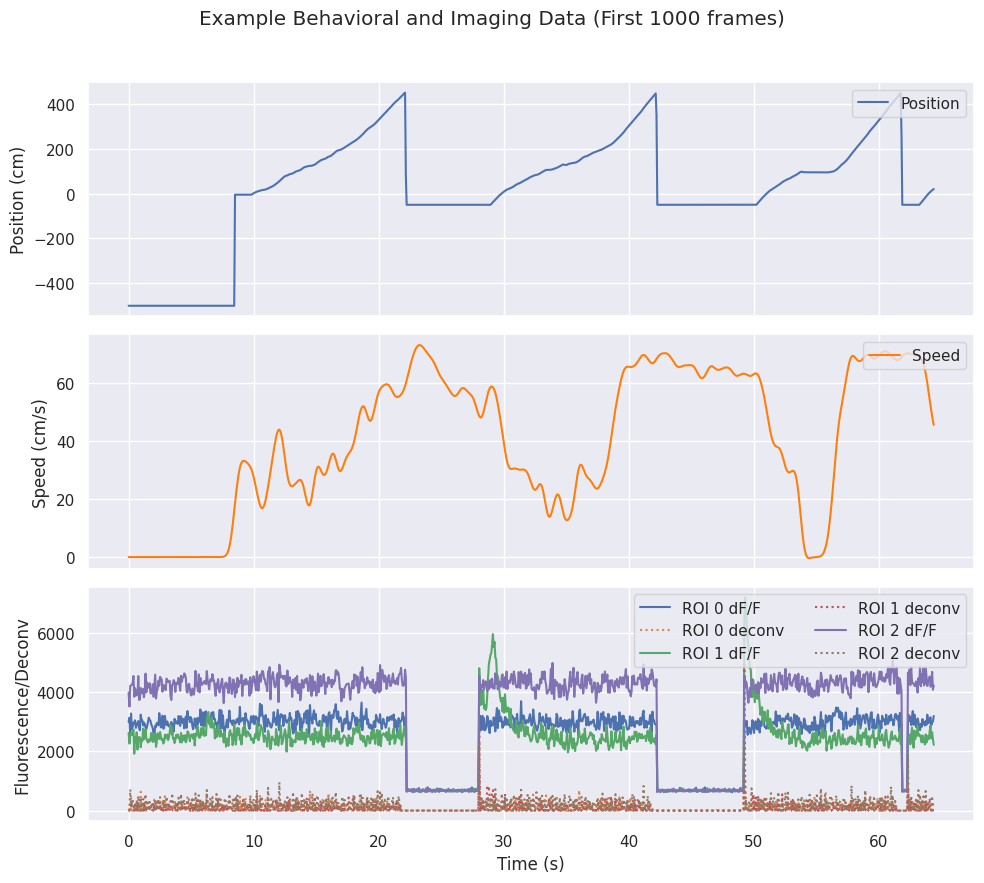

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Extract the first 1000 frames
speed = behav_series['speed'].data[:1000]
position = behav_series['position'].data[:1000]
times = behav_series['speed'].timestamps[:1000]

fluor = data_interfaces['Fluorescence'].roi_response_series['plane0']
deconv = data_interfaces['Deconvolved'].roi_response_series['plane0']
roi_ids = np.arange(3)
fluor_traces = fluor.data[:1000, roi_ids]
deconv_traces = deconv.data[:1000, roi_ids]

fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharex=True)
axs[0].plot(times, position, label='Position')
axs[0].set_ylabel('Position (cm)')
axs[0].legend(loc='upper right')
axs[1].plot(times, speed, label='Speed', color='tab:orange')
axs[1].set_ylabel('Speed (cm/s)')
axs[1].legend(loc='upper right')
for i, roi in enumerate(roi_ids):
    axs[2].plot(times, fluor_traces[:, i], label=f'ROI {roi} dF/F')
    axs[2].plot(times, deconv_traces[:, i], ls=':', label=f'ROI {roi} deconv')
axs[2].set_ylabel('Fluorescence/Deconv')
axs[2].set_xlabel('Time (s)')
axs[2].legend(loc='upper right', ncol=2)
plt.suptitle('Example Behavioral and Imaging Data (First 1000 frames)')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- Neural and behavioral time series are directly aligned in time.
- Movement patterns, lap transitions, and cell activity “events” can be readily visualized and inspected.
- Both dF/F signals (continuous) and deconvolved “event” signals are available for each ROI.

## Visualizing Example ROI (Cell) Masks

Let's plot the first ten ROI (cell mask) segmentations, each as a binary image, to see their spatial shapes.
We do **not** overlay on the background because alignment is ambiguous; this shows mask shapes in pixel space.

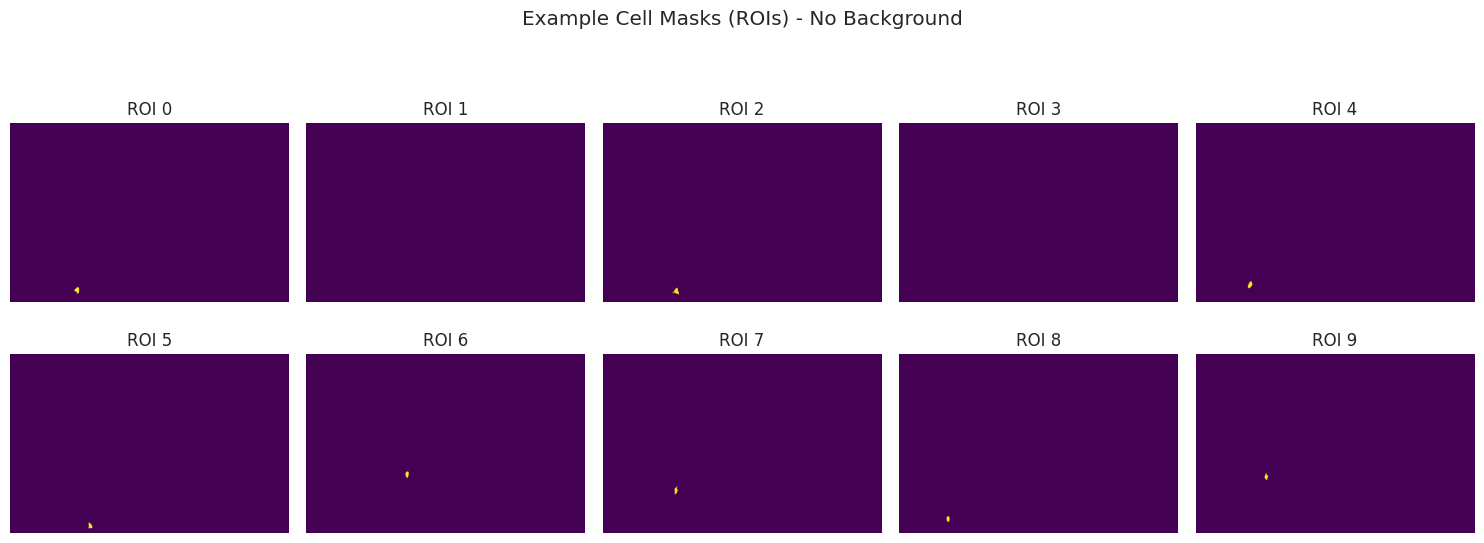

In [6]:
# Prepare masks for 10 ROIs (shape from file structure)
n_rois_show = 10
mask_shape = (512, 796)  # Shape from file info; adjust if needed for other datasets
masks = np.zeros((n_rois_show, *mask_shape), dtype=float)
for i in range(min(n_rois_show, len(roi_table))):
    pixels = roi_table.iloc[i]['pixel_mask']
    for x, y, w in pixels:
        xi, yi = int(round(x)), int(round(y))
        if 0 <= yi < mask_shape[0] and 0 <= xi < mask_shape[1]:
            masks[i, yi, xi] = w

# Plot masks separately
fig, axs = plt.subplots(2, n_rois_show//2, figsize=(15, 6))
axs = axs.flatten()
for i in range(n_rois_show):
    axs[i].imshow(masks[i], cmap='viridis', vmin=0, vmax=1)
    axs[i].set_title(f'ROI {i}')
    axs[i].axis('off')
plt.suptitle('Example Cell Masks (ROIs) - No Background')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Each panel shows the shape and pixel location of one extracted ROI mask. ROIs can be matched to their trace index.

## Reanalysis Example: Linking Cell Activity to Animal Position

To demonstrate a typical reanalysis, let's extract and plot activity from a single ROI and show its relationship to the animal’s position on the virtual track.

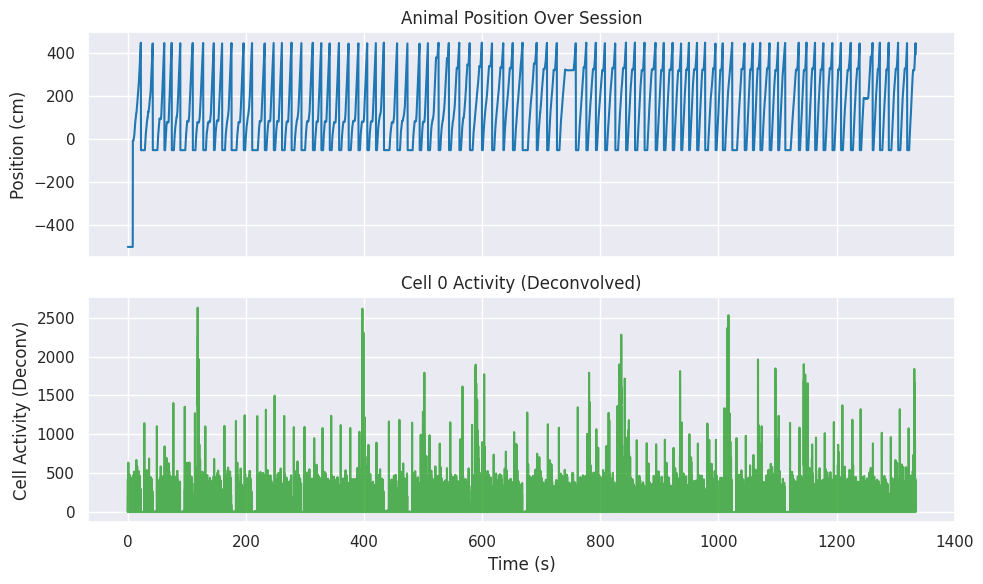

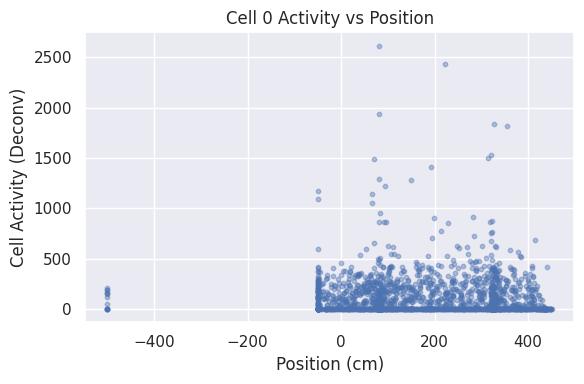

In [7]:
# Select an ROI index
roi_idx = 0

# Extract full deconvolved trace for this cell and aligned behavior
trace = data_interfaces['Deconvolved'].roi_response_series['plane0'].data[:, roi_idx]
position = behav_series['position'].data[:]
times = behav_series['position'].timestamps[:]

# Plot activity alongside animal position
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
axs[0].plot(times, position, color='tab:blue')
axs[0].set_ylabel('Position (cm)')
axs[0].set_title('Animal Position Over Session')
axs[1].plot(times, trace, color='tab:green', alpha=0.8)
axs[1].set_ylabel('Cell Activity (Deconv)')
axs[1].set_title(f'Cell {roi_idx} Activity (Deconvolved)')
axs[1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

# Scatter plot: activity vs. position
step = 10  # Downsample for clarity
plt.figure(figsize=(6, 4))
plt.scatter(position[::step], trace[::step], alpha=0.4, s=10)
plt.xlabel('Position (cm)')
plt.ylabel('Cell Activity (Deconv)')
plt.title(f'Cell {roi_idx} Activity vs Position')
plt.tight_layout()
plt.show()

These analyses illustrate how to:
- Access cell and behavior timeseries.
- Align, visualize, and correlate neural activity with behavior.
- Generate foundation plots for further spatial tuning or place-coding analyses.

**You can substitute any ROI index, behavioral variable, or further filter/session as needed for your research.**

## Next Steps & Resources

- Explore ROIs, sessions, and behavioral variables of interest for your scientific question.  
- Use the example code here as a template for analyses such as place field mapping, trial segmentation, or population coding.
- See the original [analysis code](https://github.com/GiocomoLab/Sosa_et_al_2024) for advanced tools and published figures.

**Dataset Link:**  
[https://dandiarchive.org/dandiset/001361/0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045)

**Additional Resources:**  
- [DANDI documentation](https://www.dandiarchive.org/)
- [NWB Users' Guide](https://pynwb.readthedocs.io/en/stable/)
- [Neurosift NWB file explorer](https://neurosift.app/nwb)

---

_We hope this notebook helped you get started exploring Dandiset 001361!_